



\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#
#     PART B Section II       # 
\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#
  

In [0]:
# Importation of libraries (incuding tensorflow and keras)
import tensorflow as tf
from tensorflow import keras
from sklearn import preprocessing
import h5py

import numpy as np
import matplotlib.pyplot as plt

# read data
from google.colab import drive
drive.mount('/content/gdrive')
!unzip "/content/gdrive/My Drive/Colab Notebooks/data.zip"

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
Archive:  /content/gdrive/My Drive/Colab Notebooks/data.zip
replace data.h5? [y]es, [n]o, [A]ll, [N]one, [r]ename: n


In [0]:
# loadData is a function which load the dataset and split into training/test images and labels
def loadData():
  with h5py.File('data.h5','r') as hf:
    print('List of arrays in this file: \n', hf.keys())
    allTrain = hf.get('trainData')
    allTest = hf.get('testData')
    npTrain = np.array(allTrain)
    npTest = np.array(allTest)
    print('Shape of the array dataset_1: \n', npTrain.shape)
    print('Shape of the array dataset_2: \n', npTest.shape)
    return npTrain[:,:-1], npTrain[:, -1], npTest[:,:-1], npTest[:, -1]



In [0]:
# Load the data
x_train, y_train, x_test, y_test = loadData()


List of arrays in this file: 
 KeysView(<HDF5 file "data.h5" (mode r)>)
Shape of the array dataset_1: 
 (200000, 785)
Shape of the array dataset_2: 
 (17000, 785)


In [0]:
# Build the keras neronal network model:
# Here, there are 2 layers:
#   1st layer of 200 fully-connected neurons with a relu activation 
#   2nd layer of 10 fully-connected neurons with a softmax activation 
model_1 = tf.keras.models.Sequential([
    tf.keras.layers.Dense(200, activation=tf.nn.relu, input_shape=(x_train.shape[1],)),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

# the model is configured for training with the those parameters:
#   For the optimizer: Adam Optimization algorithm
#   For the loss: the sparse categorical cross entropy
#   The metric to be evaluated by the model: accuracy 
model_1.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# the model is trained with the those parameters:
#   epoch: 3 iterations
#   batch_size: the size of the mini batch which contains 256 elements
#   validation_split: 10% of data used as a validation data
history_1 = model_1.fit(x_train, y_train, epochs=3, batch_size=256, validation_split=0.1)

# the model is evaluated and returns test loss and accuracy
results = model_1.evaluate(x_test, y_test)

print("Final Test Loss (model 1): {:.2f}".format(results[0]))
print("Final Test Accuracy (model 1): {:.2f}".format(results[1]))

Instructions for updating:
Colocations handled automatically by placer.
Train on 180000 samples, validate on 20000 samples
Epoch 1/3
180000/180000 [==============================] - 7s 38us/sample - loss: 0.5279 - acc: 0.8472 - val_loss: 0.4471 - val_acc: 0.8676
Epoch 2/3
180000/180000 [==============================] - 7s 38us/sample - loss: 0.4101 - acc: 0.8802 - val_loss: 0.4100 - val_acc: 0.8804
Epoch 3/3
17000/17000 [==============================] - 1s 41us/sample - loss: 0.3201 - acc: 0.9087
Final Test Loss (model 1): 0.32
Final Test Accuracy (model 1): 0.91


In [0]:
# Build the keras neronal network model:
# Here, there are 2 layers:
#   1st layer of 400 fully-connected neurons with a relu activation 
#   2nd layer of 200 fully-connected neurons with a relu activation 
#   3rd layer of 10 fully-connected neurons with a softmax activation 
model_2 = tf.keras.models.Sequential([
    tf.keras.layers.Dense(400, activation=tf.nn.relu, input_shape=(x_train.shape[1],)),
    tf.keras.layers.Dense(200, activation=tf.nn.relu, input_shape=(x_train.shape[1],)),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

# the model is configured for training with the those parameters:
#   For the optimizer: Adam Optimization algorithm
#   For the loss: the sparse categorical cross entropy
#   The metric to be evaluated by the model: accuracy 
model_2.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# the model is trained with the those parameters:
#   epoch: 3 iterations
#   batch_size: the size of the mini batch which contains 256 elements
#   validation_split: 10% of data used as a validation data
history_2 = model_2.fit(x_train, y_train, epochs=3, batch_size=256, validation_split=0.1)

# the model is evaluated and returns test loss and accuracy
results = model_2.evaluate(x_test, y_test)

# Print the model result on the test data
print("Final Test Loss (model 2): {:.2f}".format(results[0]))
print("Final Test Accuracy (model 2): {:.2f}".format(results[1]))

Train on 180000 samples, validate on 20000 samples
Epoch 1/3
180000/180000 [==============================] - 13s 73us/sample - loss: 0.4759 - acc: 0.8585 - val_loss: 0.3963 - val_acc: 0.8809
Epoch 2/3
180000/180000 [==============================] - 13s 72us/sample - loss: 0.3512 - acc: 0.8931 - val_loss: 0.3681 - val_acc: 0.8889
Epoch 3/3
17000/17000 [==============================] - 1s 54us/sample - loss: 0.2743 - acc: 0.9178
Final Test Loss (model 2): 0.27
Final Test Accuracy (model 2): 0.92


In [0]:
# Build the keras neronal network model:
# Here, there are 2 layers:
#   1st layer of 600 fully-connected neurons with a relu activation 
#   2nd layer of 400 fully-connected neurons with a relu activation 
#   3rd layer of 200 fully-connected neurons with a relu activation 
#   4th layer of 10 fully-connected neurons with a softmax activation 
model_3 = tf.keras.models.Sequential([
    tf.keras.layers.Dense(600, activation=tf.nn.relu, input_shape=(x_train.shape[1],)),
    tf.keras.layers.Dense(400, activation=tf.nn.relu, input_shape=(x_train.shape[1],)),
    tf.keras.layers.Dense(200, activation=tf.nn.relu, input_shape=(x_train.shape[1],)),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

# the model is configured for training with the those parameters:
#   For the optimizer: Adam Optimization algorithm
#   For the loss: the sparse categorical cross entropy
#   The metric to be evaluated by the model: accuracy 
model_3.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# the model is trained with the those parameters:
#   epoch: 3 iterations
#   batch_size: the size of the mini batch which contains 256 elements
#   validation_split: 10% of data used as a validation data
history_3 = model_3.fit(x_train, y_train, epochs=3, batch_size=256, validation_split=0.1)

# the model is evaluated and returns test loss and accuracy
results = model_3.evaluate(x_test, y_test)

# Print the model result on the test data
print("Final Test Loss (model 3): {:.2f}".format(results[0]))
print("Final Test Accuracy (model 3): {:.2f}".format(results[1]))

Train on 180000 samples, validate on 20000 samples
Epoch 1/3
180000/180000 [==============================] - 23s 129us/sample - loss: 0.4602 - acc: 0.8609 - val_loss: 0.3777 - val_acc: 0.8832
Epoch 2/3
180000/180000 [==============================] - 23s 127us/sample - loss: 0.3386 - acc: 0.8955 - val_loss: 0.3519 - val_acc: 0.8921
Epoch 3/3
17000/17000 [==============================] - 1s 78us/sample - loss: 0.2678 - acc: 0.9197
Final Test Loss (model 3): 0.27
Final Test Accuracy (model 3): 0.92


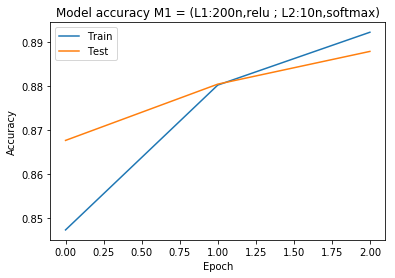

In [0]:
import matplotlib.pyplot as plt

plt.plot(history_1.history['acc']) 
# Plot training & validation accuracy values
plt.plot(history_1.history['val_acc'])
plt.title('Model accuracy M1 = (L1:200n,relu ; L2:10n,softmax)')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

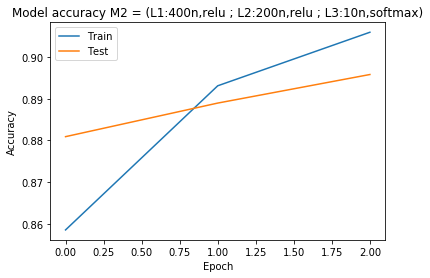

In [0]:
plt.plot(history_2.history['acc']) 
# Plot training & validation accuracy values
plt.plot(history_2.history['val_acc'])
plt.title('Model accuracy M2 = (L1:400n,relu ; L2:200n,relu ; L3:10n,softmax)')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

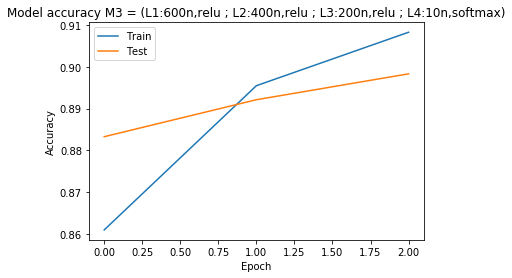

In [0]:
plt.plot(history_3.history['acc']) 
# Plot training & validation accuracy values
plt.plot(history_3.history['val_acc'])
plt.title('Model accuracy M3 = (L1:600n,relu ; L2:400n,relu ; L3:200n,relu ; L4:10n,softmax)')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

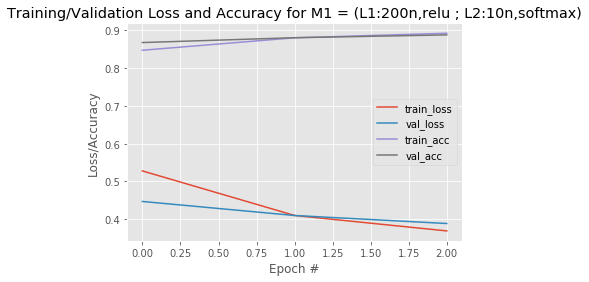

In [0]:
import matplotlib.pyplot as plt
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, 3), history_1.history["loss"], label="train_loss")
plt.plot(np.arange(0, 3), history_1.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, 3), history_1.history["acc"], label="train_acc")
plt.plot(np.arange(0, 3), history_1.history["val_acc"], label="val_acc")
plt.title("Training/Validation Loss and Accuracy for M1 = (L1:200n,relu ; L2:10n,softmax)")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()

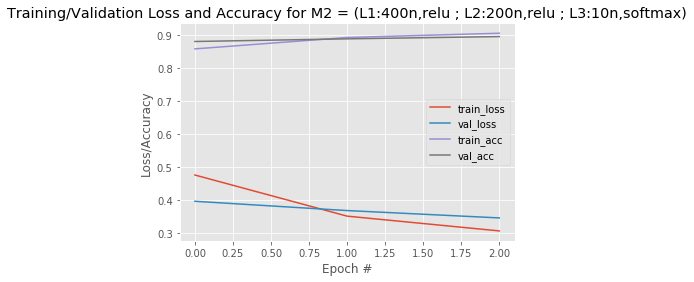

In [0]:
plt.figure()
plt.plot(np.arange(0, 3), history_2.history["loss"], label="train_loss")
plt.plot(np.arange(0, 3), history_2.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, 3), history_2.history["acc"], label="train_acc")
plt.plot(np.arange(0, 3), history_2.history["val_acc"], label="val_acc")
plt.title("Training/Validation Loss and Accuracy for M2 = (L1:400n,relu ; L2:200n,relu ; L3:10n,softmax)")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()

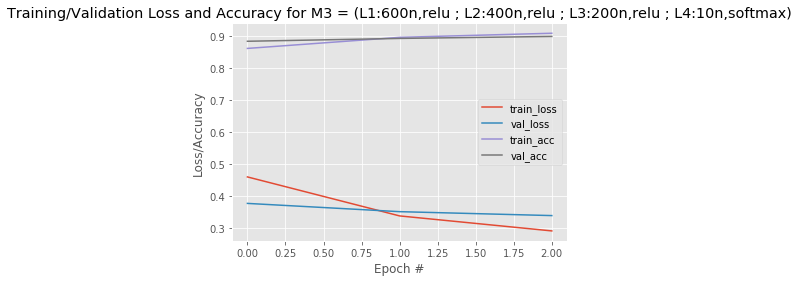

In [0]:
plt.figure()
plt.plot(np.arange(0, 3), history_3.history["loss"], label="train_loss")
plt.plot(np.arange(0, 3), history_3.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, 3), history_3.history["acc"], label="train_acc")
plt.plot(np.arange(0, 3), history_3.history["val_acc"], label="val_acc")
plt.title("Training/Validation Loss and Accuracy for M3 = (L1:600n,relu ; L2:400n,relu ; L3:200n,relu ; L4:10n,softmax)")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()

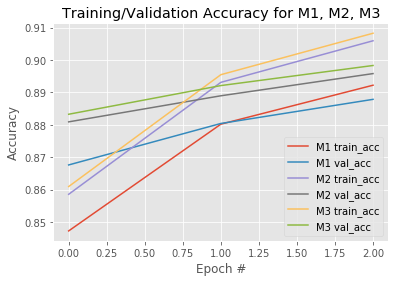

In [0]:
plt.figure()
plt.plot(np.arange(0, 3), history_1.history["acc"], label="M1 train_acc")
plt.plot(np.arange(0, 3), history_1.history["val_acc"], label="M1 val_acc")
plt.plot(np.arange(0, 3), history_2.history["acc"], label="M2 train_acc")
plt.plot(np.arange(0, 3), history_2.history["val_acc"], label="M2 val_acc")
plt.plot(np.arange(0, 3), history_3.history["acc"], label="M3 train_acc")
plt.plot(np.arange(0, 3), history_3.history["val_acc"], label="M3 val_acc")
plt.title("Training/Validation Accuracy for M1, M2, M3")
plt.xlabel("Epoch #")
plt.ylabel("Accuracy")
plt.legend()

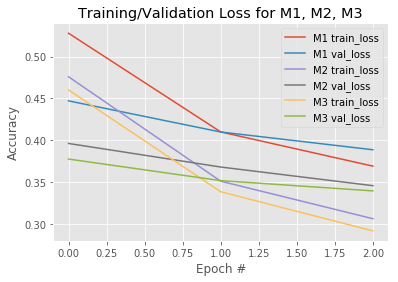

In [0]:
plt.figure()
plt.plot(np.arange(0, 3), history_1.history["loss"], label="M1 train_loss")
plt.plot(np.arange(0, 3), history_1.history["val_loss"], label="M1 val_loss")
plt.plot(np.arange(0, 3), history_2.history["loss"], label="M2 train_loss")
plt.plot(np.arange(0, 3), history_2.history["val_loss"], label="M2 val_loss")
plt.plot(np.arange(0, 3), history_3.history["loss"], label="M3 train_loss")
plt.plot(np.arange(0, 3), history_3.history["val_loss"], label="M3 val_loss")
plt.title("Training/Validation Loss for M1, M2, M3")
plt.xlabel("Epoch #")
plt.ylabel("Accuracy")
plt.legend()